In [2]:
import pandas as pd

In [50]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


________________________

Clean the text (see [data prep lesson](https://ds.codeup.com/nlp/prepare/#removing-accented-characters)) and create 3 sets of words: 

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [89]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud


def basic_clean(text):
    text = unicodedata.normalize('NFKD', text.lower())\
        .encode('ascii', 'ignore')\
        .decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9'\s]", '', text)

In [53]:
df['text_cleaned'] = df.text.apply(basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...


In [54]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [55]:
df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...


In [56]:
def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [57]:
df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...


In [58]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)

    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [59]:
df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)

In [60]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though


___

Add a column with list of words for future use.

In [61]:
# We have a list of lists that we can concat onto our DataFrame

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
words[:2]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugisgreat',
  'world',
  'labuffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wifoni']]

___

Once we have a list of words, we can transform it into a pandas `Series`, which we can then use to show us how often each of the words occurs.

Now we'll combine these three together to get one resulting data frame that we can work with:

In [62]:
df = pd.concat([df, pd.DataFrame({'clean_words': words})], axis=1)

In [63]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,clean_words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]"


In [64]:
# Create list of words from entire column for 3 categories: ham, spam, all

ham_words = ' '.join(df[df.label == 'ham'].text_filtered)
spam_words = ' '.join(df[df.label == 'spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

In [65]:
# Filter out single characters from each words list.

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [66]:
# Create Series out of value_counts for each category of words.

ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [67]:
spam_freq.head()

call    342
free    189
txt     140
text    128
ur      125
dtype: int64

In [68]:
word_counts = pd.DataFrame(pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                            .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                                     .fillna(0)
                                     .apply(lambda s: s.astype(int))
                                     )

word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


We can now use this data set to answer some interesting questions:

- Are there words that should be added to the stopword list? 
- Are there words that are significantly more likely to occur in spam than in ham? 

In [69]:
word_counts[word_counts.spam == 0].sort_values(by='ham').tail(5)

,all,ham,spam
say,86,86,0
later,114,112,0
da,112,112,0
lor,120,120,0
ltgt,241,241,0


In [70]:
word_counts[word_counts.ham < 5].sort_values(by='spam').tail(10)

,all,ham,spam
awarded,38,0,38
18,41,0,41
tc,45,2,43
16,44,1,45
guaranteed,50,0,50
urgent,60,2,59
tone,60,0,60
nokia,62,0,62
prize,80,0,80
claim,96,0,96


### Document Word Count

The length of documents is often a good feature. 

In [72]:
df['doc_length'] = [len(wordlist) for wordlist in df.clean_words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,clean_words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6


## Visualize

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

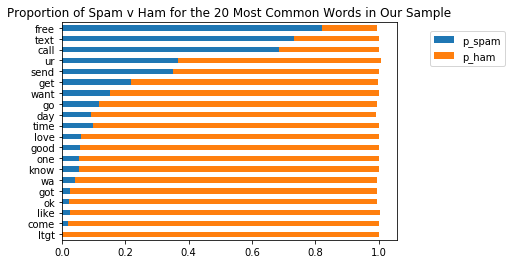

In [87]:
# Visualize the percentage of the term in ham vs. spam.

(word_counts.assign(p_spam = word_counts.spam/word_counts['all'],
                    p_ham = word_counts.ham/word_counts['all'])
                    .sort_values(by='all')[['p_spam', 'p_ham']]
                    .tail(20)
                    .sort_values(by='p_ham')
                    .plot.barh(stacked=True)
)

plt.title('Proportion of Spam v Ham for the 20 Most Common Words in Our Sample')
plt.gca().invert_yaxis()
plt.legend(loc=(1.1,.8))

plt.show()

### Word Clouds

```
python -m pip install --upgrade wordcloud
```

The wordcloud allows you to identify the relative frequency of different keywords using an easily digestible visual.

#### Common Use Cases

As a visualization technique, this method gives a more qualitative analysis of the topics in the documents.
 
#### Pros

1. It’s intuitive and easy to comprehend.
2. It helps identify overall respondent sentiment and the specific factors that drive it.
3. It provides direction for further analysis.

#### Cons

1. It fails to measure each word’s value in and of itself.
2. It allows irrelevant words to appear.
3. When words appear similar in size, it becomes difficult to differentiate them.

First we'll take a look at a simple example:

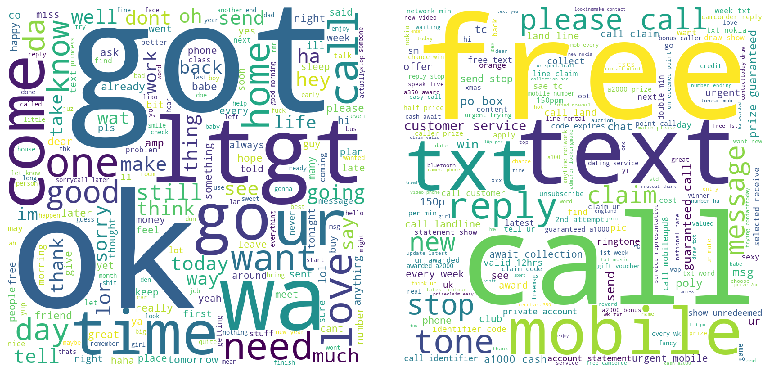

In [94]:
ham_cloud = WordCloud(background_color='white',
         height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='white',
         height=800, width=800).generate(spam_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].axis('off')
axs[1].axis('off')

plt.show()

## Bigrams

Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.

To produce the bigrams, we'll use `nltk`.

We can apply the same transformation to our ham data set in order to find out which bigrams are the most frequently occuring.

We can use these bigrams to make a word cloud as well, with a little more effort.

In [ ]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.



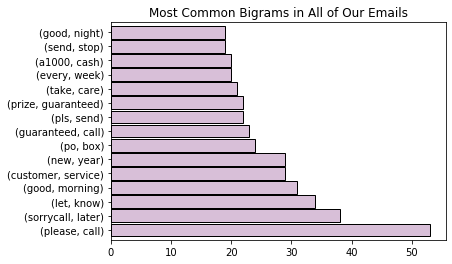

In [97]:
(
    df.clean_words.apply(nltk.bigrams)
    .apply(pd.Series)
    .stack()
    .reset_index(drop=True)
    .value_counts()
    .head(15)
    .plot.barh(width=.9, ec='black', color='thistle')
)

plt.title('Most Common Bigrams in All of Our Emails')
plt.show()

In [102]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
all_bigrams = pd.Series(list(nltk.ngrams(all_words.split(), 2))).value_counts().head(20)

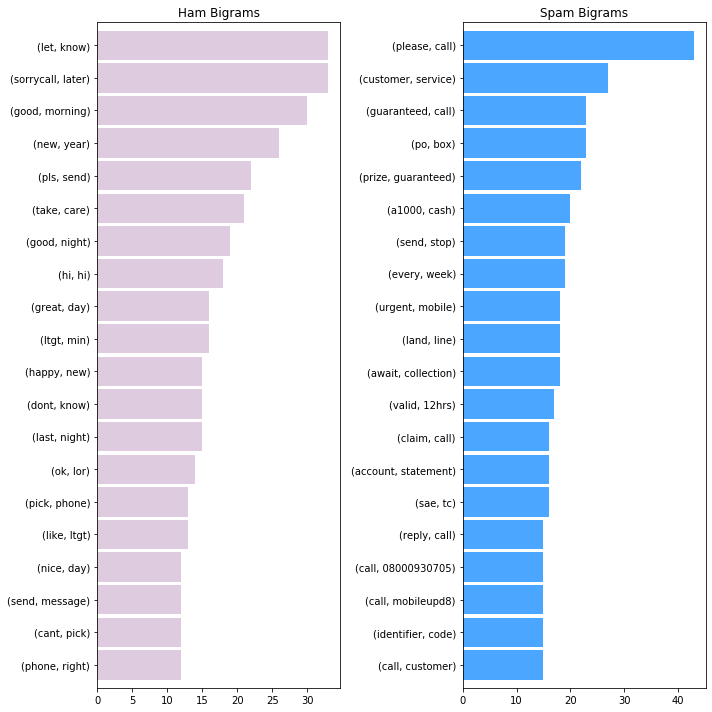

In [109]:
plt.subplot(121)
ham_bigrams.plot.barh(color='thistle', width=.9, figsize=(10,10), alpha=.8)
plt.gca().invert_yaxis()
plt.title('Ham Bigrams')

plt.subplot(122)
spam_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10,10), alpha=.8)
plt.title('Spam Bigrams')

plt.tight_layout()
plt.gca().invert_yaxis()

plt.show()

## Exercises

Do your work for this exercise in a file named `explore`.

1. Spam Data

    1. Load the spam data set.
    1. Create and explore bigrams for the spam data. Visualize them with a word
       cloud. How do they compare with the ham bigrams?
    1. Is there any overlap in the bigrams for the spam data and the ham data?
    1. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both
       the spam and ham data.

1. Explore the blog articles using the techniques discussed in the exploration
   lesson.

1. Explore the news articles using the techniques discussed in the exploration
   lesson. Use the `category` variable when exploring.


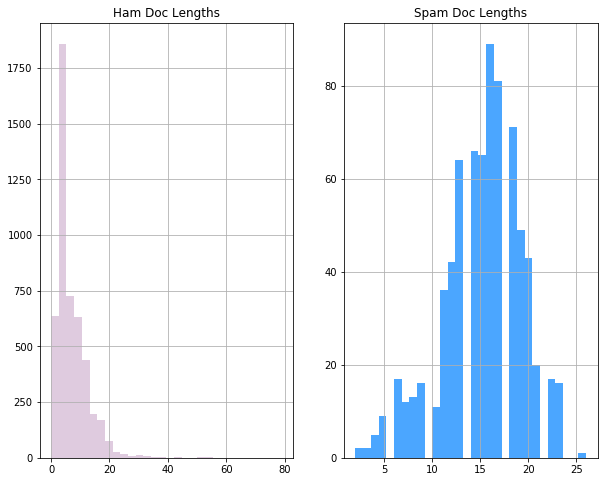

In [121]:
plt.subplot(121)

df[df.label == 'ham'].doc_length.hist(color='thistle', figsize=(10,8), alpha=.8, bins=30)
plt.title('Ham Doc Lengths')

plt.subplot(122)
df[df.label == 'spam'].doc_length.hist(color='dodgerblue', figsize=(10,8), alpha=.8, bins=30)
plt.title('Spam Doc Lengths')

plt.show()

## Feature Extraction

1. Word count: how many words appear in each document
2. Term Frequency (TF): How often a word appears in a document.
3. Inverse Document Frequency (IDF): How much information a word provides, based on how commonly a word appears across multiple documents. The more frequently a word appears, the lower the IDF for that word will be. $$
\mbox{idf}(\mbox{word})
=
\log\left(\frac{\mbox{# of documents}}{\mbox{# of documents containing the word}}\right)
$$

4. Term Frequency - Inverse Document Frequency (TF-IDF): The multiplication of the two measures above. A word that has a high frequency in a document will have a high TF. If it appears in many other documents, than the information the word provides, or uniqueness of that word, is lowered. This is done mathematically by multiplying by the IDF, which will approach 0 and the number of documents with the word increases. 

### Term Frequency

Term frequency describes how frequently a word appears **in a document**. It can be calculated in a number of ways:

- **Raw Count**: The count of the number of occurences of each word **in the document**.

- **Frequency**: The number of times each word appears divided by the total number of words **in the document**.
    
- **Augmented Frequency**: The frequency of each word divided by the maximum frequency **in the document**. This can help prevent bias towards larger documents.